In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
from scipy import stats

from matplotlib import cm

In [4]:
Path = 'D:/Results/Onetime/20200706_1stevidence_cb_sub_updraft_GRL/1st_draft_old_withLASSO/Data/'

tmp = glob.glob(Path + 'Composite_W_profile_WRF_20201017.nc')
filename = tmp[0]

fWRF = xr.open_dataset(filename)

wwml_WRF = fWRF['wwml'].values
tkeml_WRF = fWRF['tkeml'].values
wb_00_WRF = fWRF['wcl'].values
wb_01_WRF = fWRF['wcl_01'].values
wb_05_WRF = fWRF['wcl_05'].values
wstar_WRF = fWRF['wstar'].values
aclcb_WRF = fWRF['aclcb'].values
CIN_WRF = fWRF['CIN'].values
lst_WRF = fWRF['overpass_cases'].values

indWRF = np.where((100.*aclcb_WRF > 0.1) & 
               (100.*aclcb_WRF < 40.) & 
               (wb_05_WRF > 0) &
               (wstar_WRF > 0) &
               (tkeml_WRF > 0) &
               (CIN_WRF > -100.))

<ipython-input-4-322db0c70267>:21: RuntimeWarning: invalid value encountered in greater
  (wstar_WRF > 0) &


In [5]:
Path = 'D:/Results/Onetime/20200706_1stevidence_cb_sub_updraft_GRL/1st_draft_old_withLASSO/Data/'

tmp = glob.glob(Path + 'Composite_W_profile_SAM_20201017.nc')
filename = tmp[0]

fSAM = xr.open_dataset(filename)

wwml_SAM = fSAM['wwml'].values
tkeml_SAM = fSAM['tkeml'].values
wb_00_SAM = fSAM['wcl'].values
wb_01_SAM = fSAM['wcl_01'].values
wb_05_SAM = fSAM['wcl_05'].values
wstar_SAM = fSAM['wstar'].values
aclcb_SAM = fSAM['aclcb'].values
zcb_SAM = fSAM['zcb'].values
zmltop_SAM = fSAM['zmltop'].values
CIN_SAM = fSAM['CIN'].values
lst_SAM = fSAM['overpass_cases'].values

indSAM = np.where((100.*aclcb_SAM > 0.1) & 
               (100.*aclcb_SAM < 40.) & 
               (wb_05_SAM > 0) &
               (wwml_SAM > 0) &
               (tkeml_SAM > 0) &
               (zcb_SAM - zmltop_SAM < 0.5) &
               (CIN_SAM != -100.))

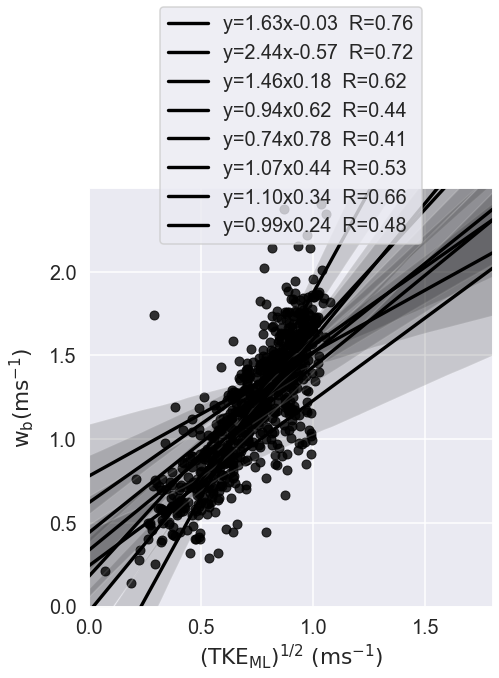

In [9]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)

#WRF
x =  np.sqrt(0.5*wwml_WRF[indWRF])
y = wb_00_WRF[indWRF]
z = lst_WRF[indWRF]

axs.set_ylim((0., 2.5))
axs.set_xlim((0., 1.8))

hr_st = [0, 5, 6, 7, 8, 9, 10, 11]
hr_nd = [5, 6, 7, 8, 9, 10, 11, 100]
nhr = len(hr_st)

for ihr in np.arange(nhr):
    ind = np.where((z > hr_st[ihr]) & (z <= hr_nd[ihr]))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[ind],y[ind])

    sns.regplot(x=x[ind], y=y[ind], ax = axs, line_kws={'label':"y={0:.2f}x{1:.2f}  R={2:.2f}".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.15))


axs.set_xlabel(r"$\mathrm{(TKE_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w_b (ms^{-1})}$", labelpad=13)

axs.set_yticks(np.arange(0, 2.5, 0.5))